# Training the model with 20 epochs

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=612a85c612c2f2f4da64dd5e0ce908022a0653b7f01bacf6f13dacbab773f6d5
  Stored in directory: c:\users\keerti\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [20]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 21s 674ms/step - loss: 0.6930 - accuracy: 0.5081 - val_loss: 0.6940 - val_accuracy: 0.4879
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 21s 693ms/step - loss: 0.6931 - accuracy: 0.5081 - val_loss: 0.6939 - val_accuracy: 0.4879
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
31/31 [==============================] - 23s 755ms/step - loss: 0.6931 - accuracy: 0.5081 - val_loss: 0.6938 - val_accuracy: 0.4879
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
31/31 [==============================] - 24s 767ms/step - loss: 0.6931 - accuracy: 0.5081 - val_loss: 0.6939 - val_accuracy: 0.4879
Epoch 5/20
31/31 [==============================] - 24s 790ms/step - loss: 0.6930 - accuracy: 0.5081 - val_loss: 0.6938 - val_accuracy: 0.4879
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/20
31/31 [==============================] - 2

In [11]:
history

In [13]:
pip install matplotlib

  Using cached matplotlib-3.3.4-cp37-cp37m-win_amd64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-win_amd64.whl (51 kB)
  Using cached Pillow-8.1.0-cp37-cp37m-win_amd64.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.


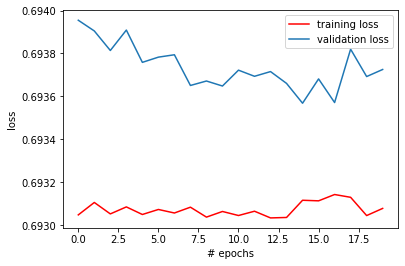

In [21]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

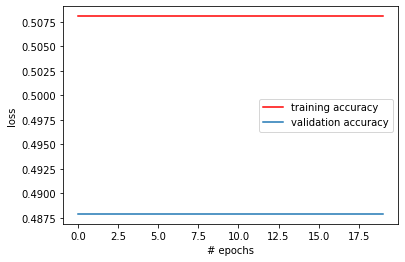

In [22]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 162ms/step - loss: 0.6941 - accuracy: 0.4783
[0.6940630078315735, 0.47826087474823]
